In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Dataset\Titanic\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.size

10692

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [11]:
df.drop('Name',axis=1,inplace=True)

In [12]:
df.drop('Ticket',axis=1,inplace=True)

In [13]:
df.drop('Parch',axis=1,inplace=True)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Fare             0
Embarked         2
dtype: int64

In [15]:
cat=df.select_dtypes(include=[object]).columns
num=df.select_dtypes(exclude=[object]).columns
print('CAT:',cat)
print('Num:',num)

CAT: Index(['Sex', 'Embarked'], dtype='object')
Num: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')


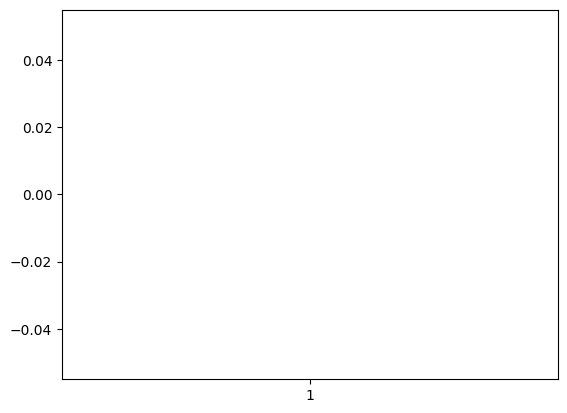

In [16]:
plt.boxplot(df['Age'])
plt.show()

In [17]:
df['Age']=df['Age'].fillna(df['Age'].mean())

**Categorical Analysis**


In [18]:
for i in cat:
    a=df[i].unique()
    print(i,a)

Sex ['male' 'female']
Embarked ['S' 'C' 'Q' nan]


In [19]:
for i in cat:
    a=df[i].nunique()
    print(i,a)

Sex 2
Embarked 3


**Barplot**

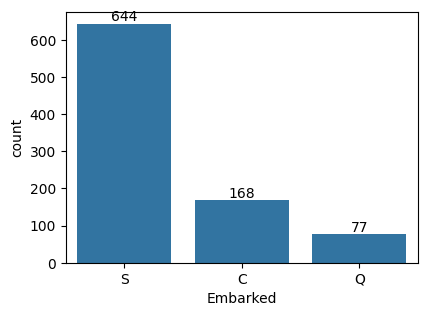

In [20]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat[1:]):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

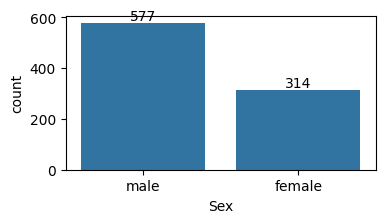

In [21]:
plt.figure(figsize=(4,2))
ax=sns.countplot(x=df['Sex'])
ax.bar_label(ax.containers[0])
plt.show()

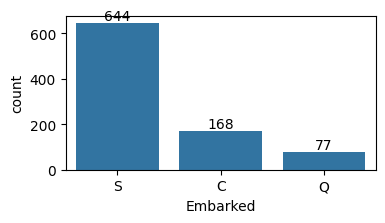

In [22]:
plt.figure(figsize=(4,2))
ax=sns.countplot(x=df['Embarked'])
ax.bar_label(ax.containers[0])
plt.show()

**Numerical Analysis**

In [23]:
for i in num:
    d_count=round(df[i].count(),2)
    d_max=round(df[i].max(),2)
    d_min=round(df[i].min(),2)
    d_mean=round(df[i].mean(),2)
    d_median=round(df[i].median(),2)
    d_std=round(df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

PassengerId count: 891
PassengerId max: 891
PassengerId min: 1
PassengerId mean: 446.0
PassengerId median: 446.0
PassengerId std: 257.35
------------------------------------
Survived count: 891
Survived max: 1
Survived min: 0
Survived mean: 0.38
Survived median: 0.0
Survived std: 0.49
------------------------------------
Pclass count: 891
Pclass max: 3
Pclass min: 1
Pclass mean: 2.31
Pclass median: 3.0
Pclass std: 0.84
------------------------------------
Age count: 891
Age max: 80.0
Age min: 0.42
Age mean: 29.7
Age median: 29.7
Age std: 13.0
------------------------------------
SibSp count: 891
SibSp max: 8
SibSp min: 0
SibSp mean: 0.52
SibSp median: 0.0
SibSp std: 1.1
------------------------------------
Fare count: 891
Fare max: 512.33
Fare min: 0.0
Fare mean: 32.2
Fare median: 14.45
Fare std: 49.69
------------------------------------


In [24]:
for i in num:
    q1=np.quantile(df[i],0.25)
    q2=np.quantile(df[i],0.50)
    q3=np.quantile(df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

PassengerId q1: 223.5
PassengerId q2: 446.0
PassengerId q3: 3
------------
Survived q1: 0.0
Survived q2: 0.0
Survived q3: 3
------------
Pclass q1: 2.0
Pclass q2: 3.0
Pclass q3: 3
------------
Age q1: 22.0
Age q2: 29.69911764705882
Age q3: 3
------------
SibSp q1: 0.0
SibSp q2: 0.0
SibSp q3: 3
------------
Fare q1: 7.9104
Fare q2: 14.4542
Fare q3: 3
------------


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,512.329200


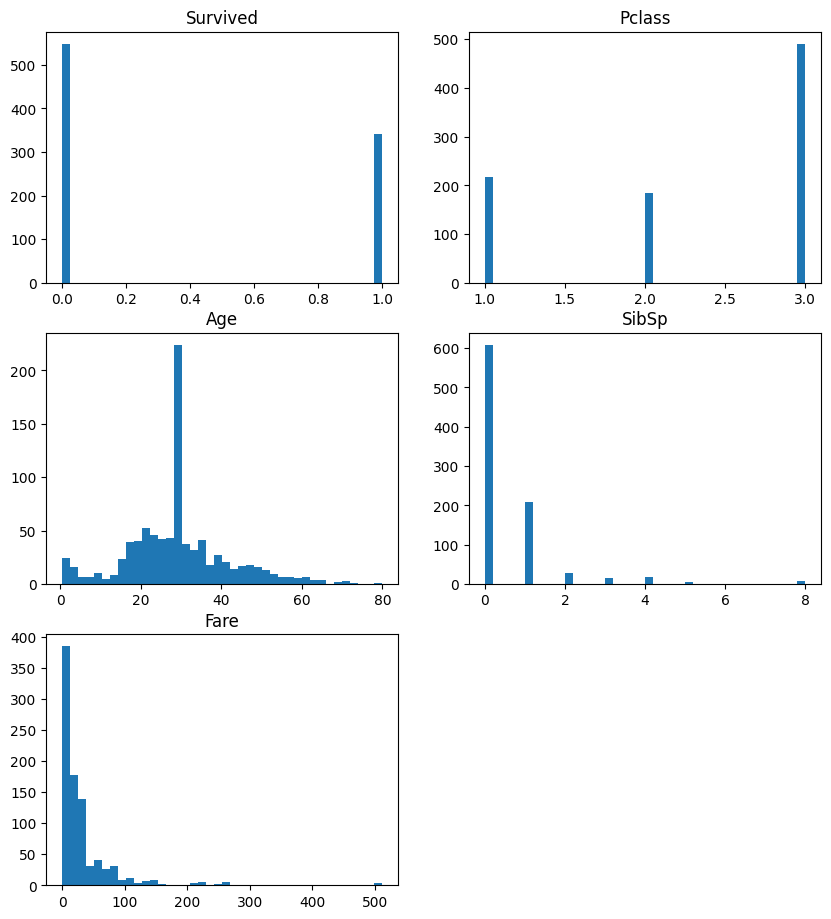

In [26]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

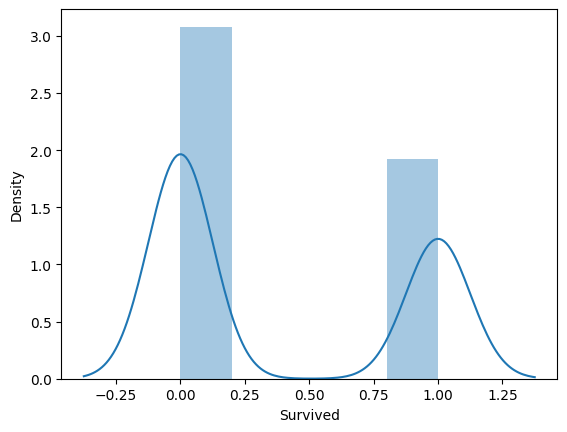

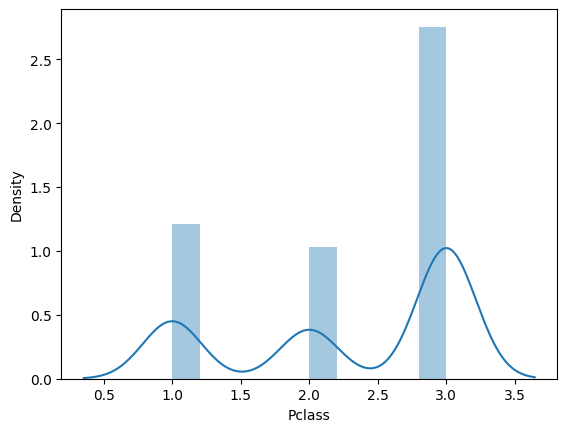

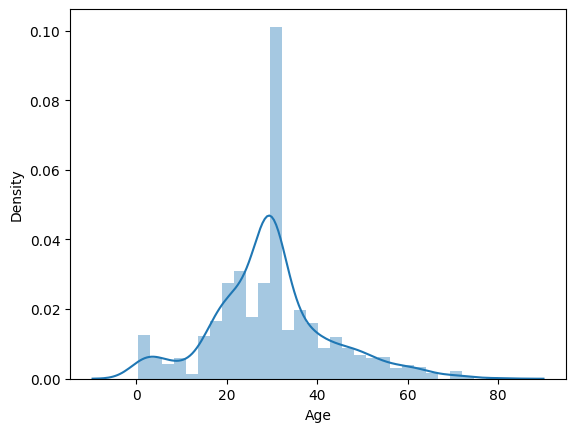

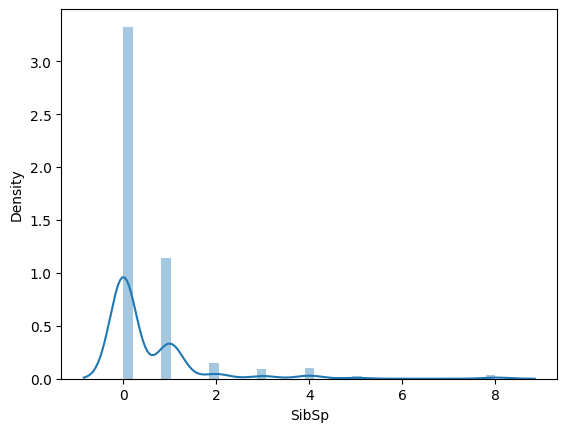

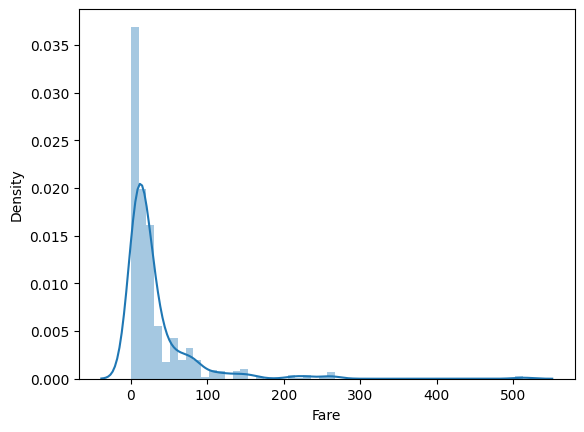

In [27]:
for i in num[1:]:
    #plt.subplot(3,2,i+1)
    sns.distplot(df[i])
   # plt.subplot(3,2,i+1)
    plt.show()

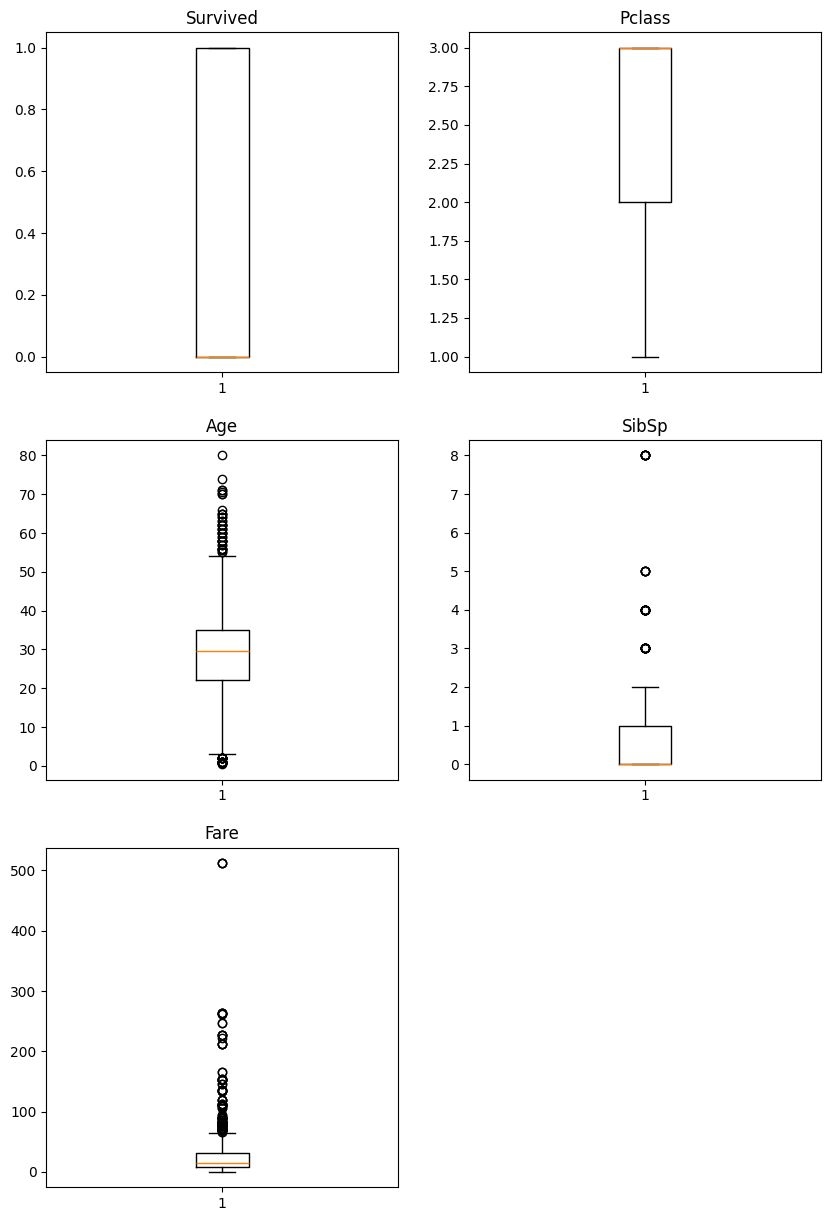

In [28]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [29]:
q1=np.quantile(df['Age'],0.25)
q2=np.quantile(df['Age'],0.50)
q3=np.quantile(df['Age'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=df['Age']>ub1
con2=df['Age']<lb1
outlier=df[con1|con2]
len(outlier)

66

In [30]:
v=(len(outlier)/len(df))*100
v

7.4074074074074066

In [31]:
df["Age"]=np.clip(df['Age'],lb1,ub1)

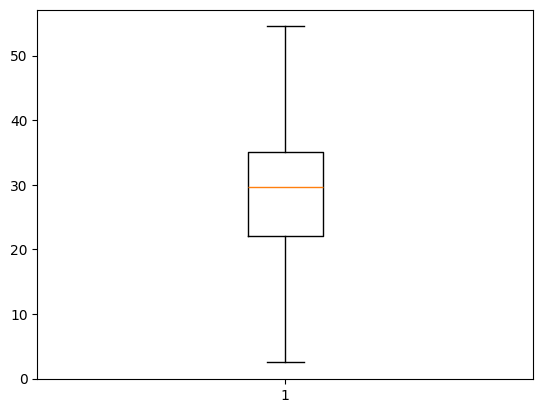

In [32]:
plt.boxplot(df['Age'])
plt.show()

In [33]:
q1=np.quantile(df['Fare'],0.25)
q2=np.quantile(df['Fare'],0.50)
q3=np.quantile(df['Fare'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=df['Fare']>ub2
con2=df['Fare']<lb2
outlier=df[con1|con2]
len(outlier)

116

In [34]:
df["Fare"]=np.clip(df['Fare'],lb1,ub1)

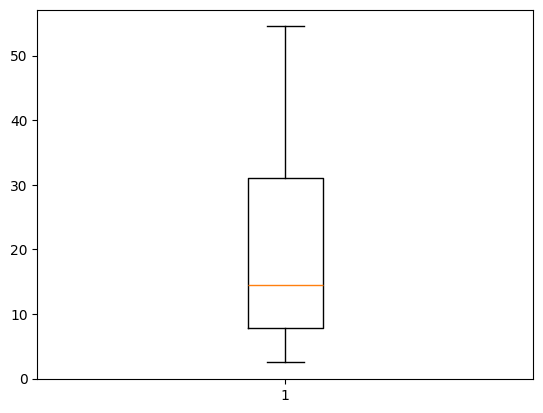

In [35]:
plt.boxplot(df['Fare'])
plt.show()

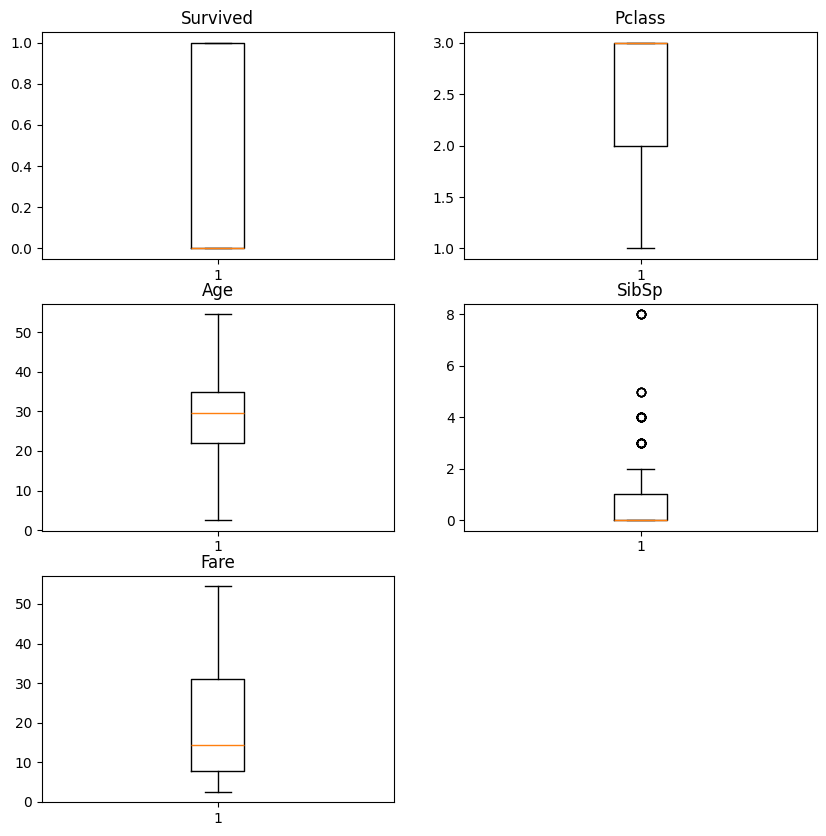

In [36]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num[1:]):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

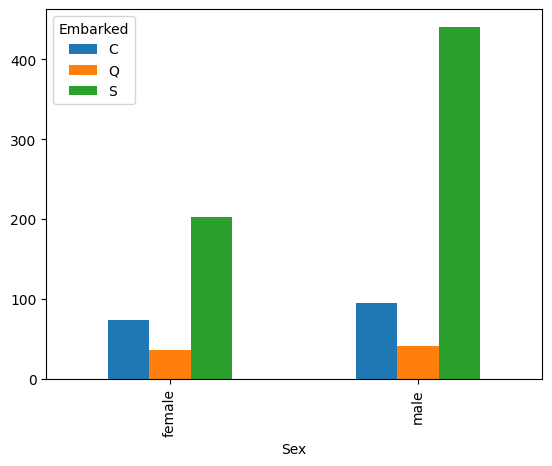

In [37]:
col1=df['Sex']
col2=df['Embarked']

result=pd.crosstab(col1,col2)
#result
result.plot(kind='bar')
plt.show()

**Numerical Vs Numerical**

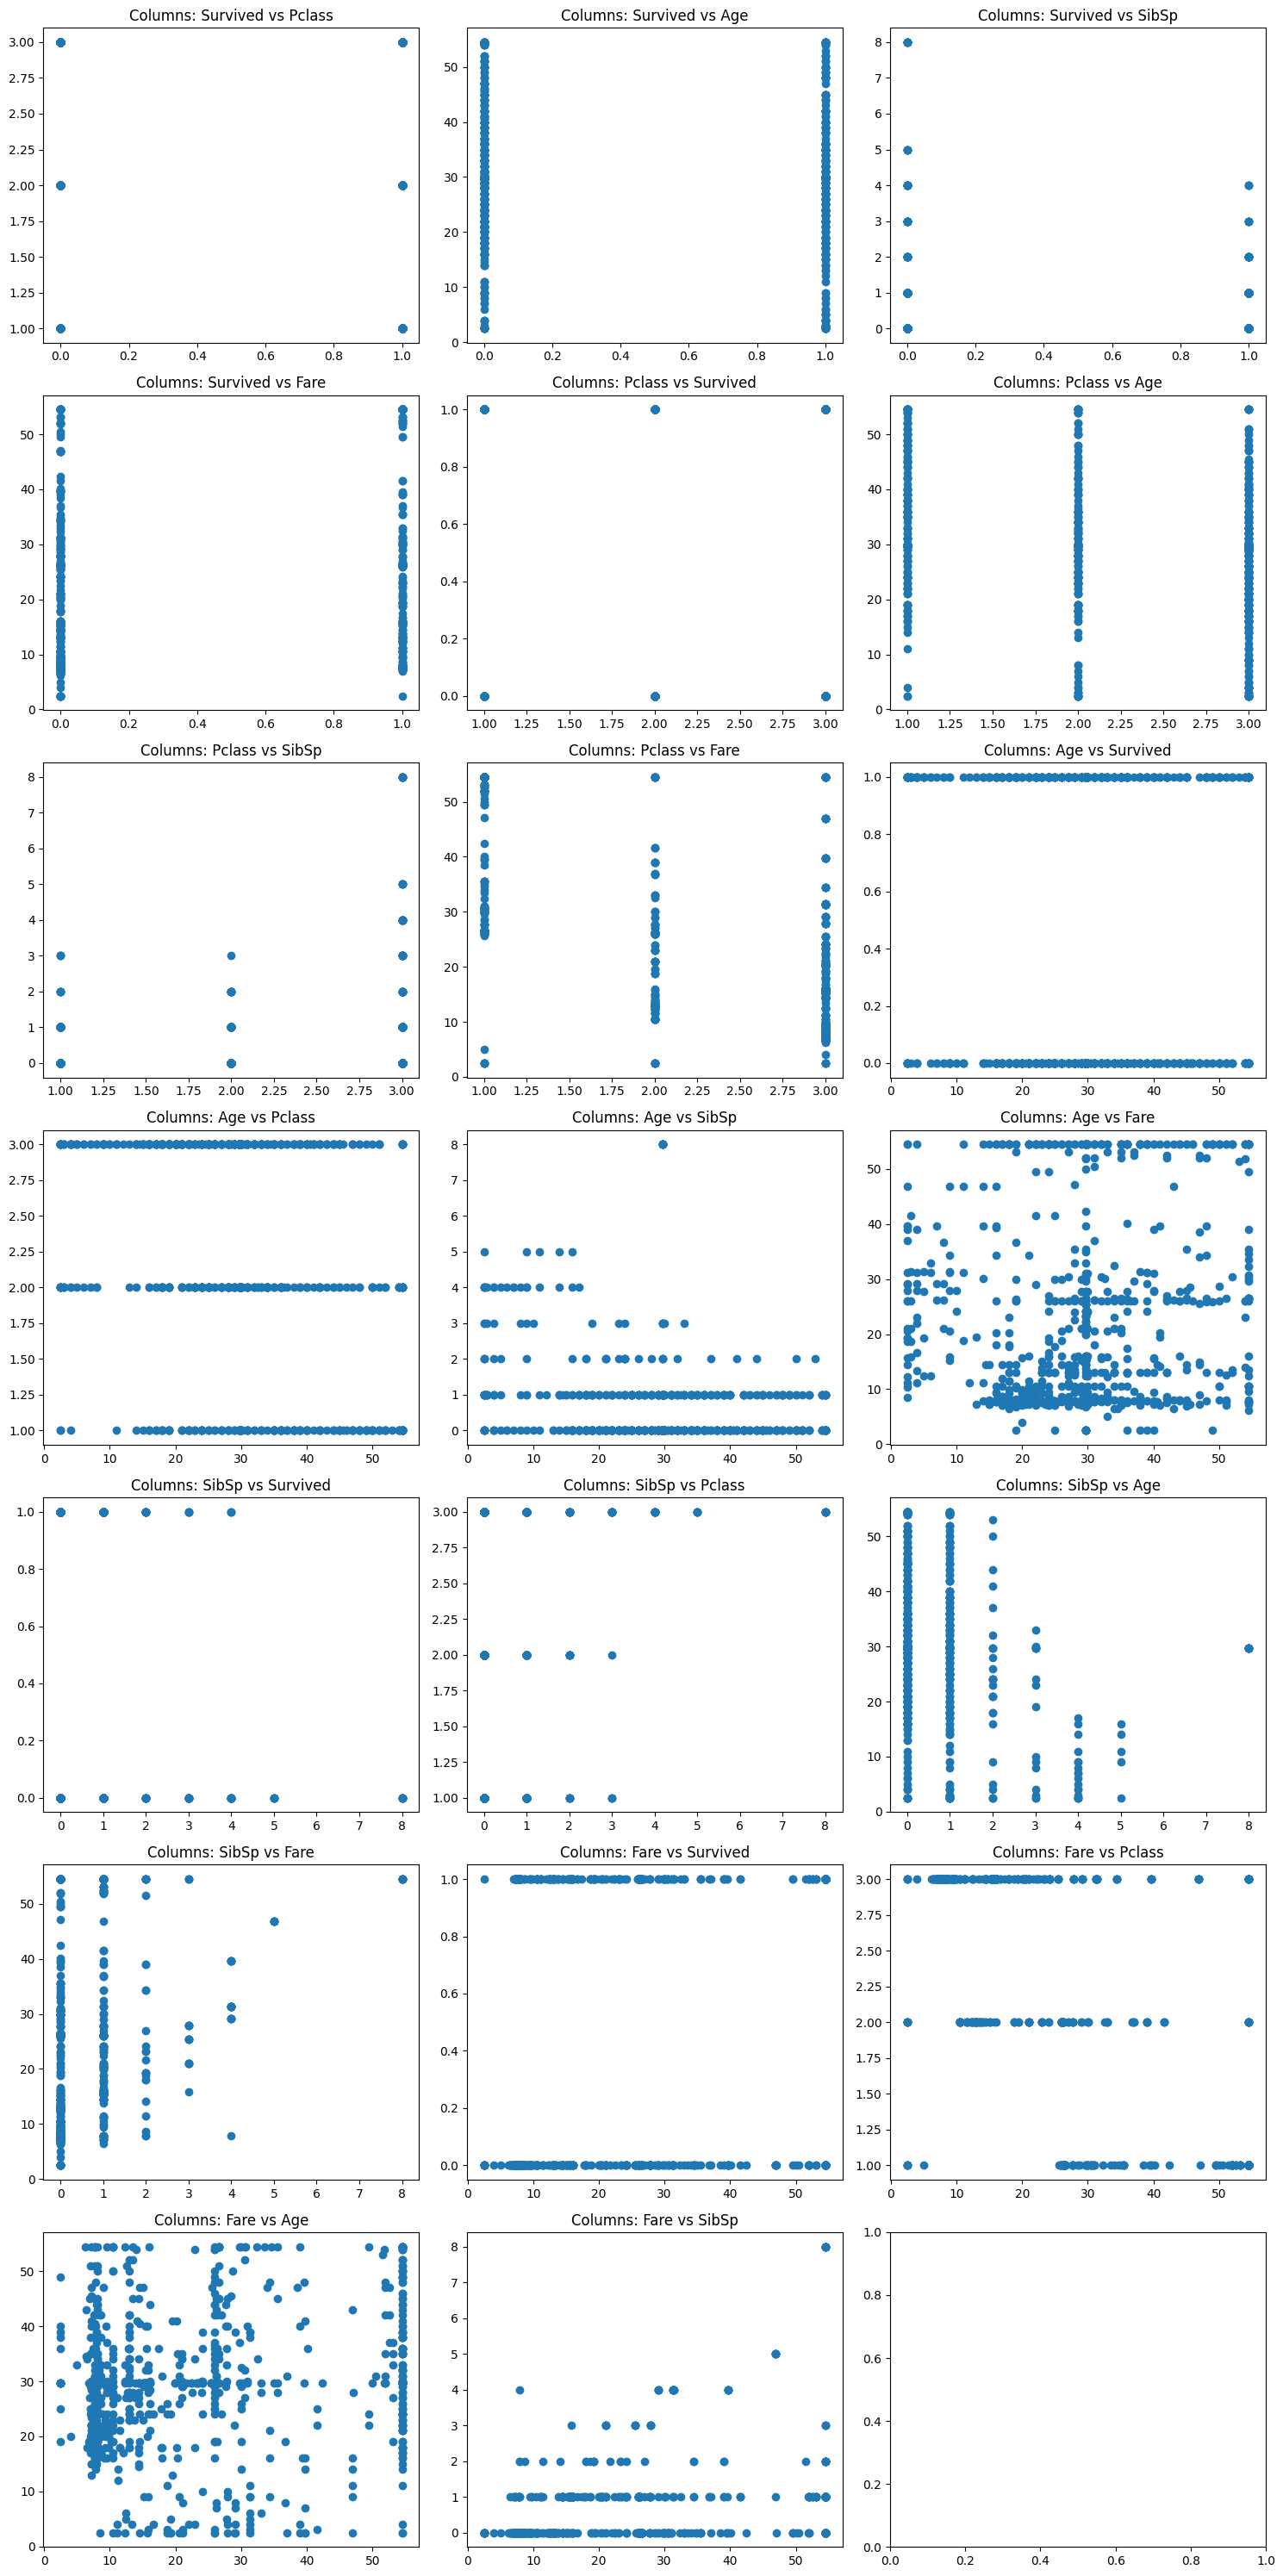

In [38]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7* 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num[1:]:
    for j in num[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            ax.scatter(df[i], df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Correlation**

In [39]:
corr=df.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035533,-0.057527,0.004667
Survived,-0.005007,1.000000,-0.338481,-0.065857,-0.035322,0.316587
Pclass,-0.035144,-0.338481,1.000000,-0.330962,0.083081,-0.722085
Age,0.035533,-0.065857,-0.330962,1.000000,-0.238735,0.132317
SibSp,-0.057527,-0.035322,0.083081,-0.238735,1.000000,0.346025
Fare,0.004667,0.316587,-0.722085,0.132317,0.346025,1.000000


**HeatMap**

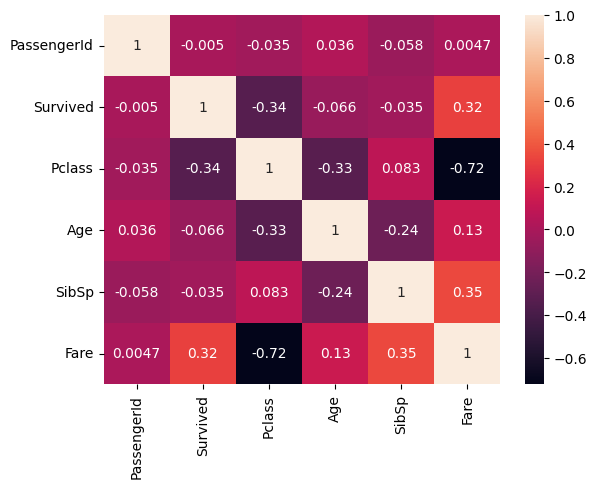

In [40]:
sns.heatmap(corr,annot=True)
plt.show()

In [41]:
for i in (num):
    print(i,df[i].skew())

PassengerId 0.0
Survived 0.4785234382949897
Pclass -0.6305479068752845
Age 0.08084597035443017
SibSp 3.6953517271630565
Fare 0.8858773256317157


In [42]:
df['SibSp'] = np.log1p(df['SibSp'])

In [43]:
df['SibSp']=np.sqrt(df['SibSp'])

In [44]:
df['SibSp'].skew()

0.9672484745036443

In [45]:
for i in (num):
    print(i,df[i].skew())

PassengerId 0.0
Survived 0.4785234382949897
Pclass -0.6305479068752845
Age 0.08084597035443017
SibSp 0.9672484745036443
Fare 0.8858773256317157


In [46]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.000000,0.832555,7.250,S
1,2,1,1,female,38.000000,0.832555,54.500,C
2,3,1,3,female,26.000000,0.000000,7.925,S
3,4,1,1,female,35.000000,0.832555,53.100,S
4,5,0,3,male,35.000000,0.000000,8.050,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0.000000,13.000,S
887,888,1,1,female,19.000000,0.000000,30.000,S
888,889,0,3,female,29.699118,0.832555,23.450,S
889,890,1,1,male,26.000000,0.000000,30.000,C


**Convert categorical To Numerical**

In [47]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [48]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.000000,0.832555,7.250,2
1,2,1,1,0,38.000000,0.832555,54.500,0
2,3,1,3,0,26.000000,0.000000,7.925,2
3,4,1,1,0,35.000000,0.832555,53.100,2
4,5,0,3,1,35.000000,0.000000,8.050,2
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0.000000,13.000,2
887,888,1,1,0,19.000000,0.000000,30.000,2
888,889,0,3,0,29.699118,0.832555,23.450,2
889,890,1,1,1,26.000000,0.000000,30.000,0


In [49]:
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**Machine Learning**

In [50]:
X=df.drop('Survived',axis=1)

y=df['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [53]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 8)
(712, 7)
(179, 7)
(712,)
(179,)


**Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Predictions**

In [55]:
y_pred_dt=dtree.predict(X_test)

**Metrices**

In [56]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [57]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 73.18
F1 is: 0.68
Precision is: 0.64
Recall is: 0.71
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       109
           1       0.64      0.71      0.68        70

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.73      0.73       179



**Confusion Metrices**

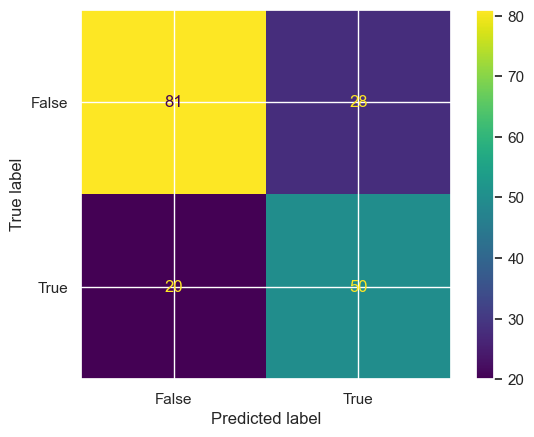

In [58]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [59]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 81
False postive: 28
False negative: 20
True postive: 50


**ROC-AUC Curve**

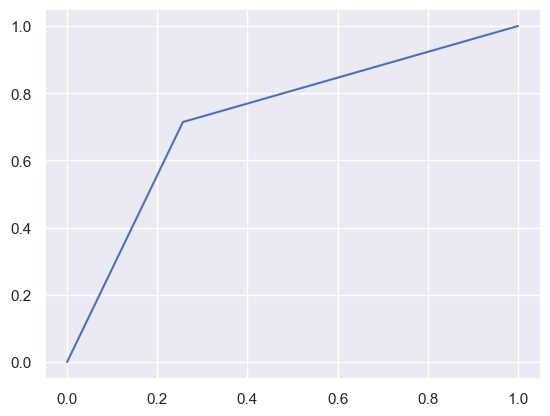

In [60]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [61]:

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

**Prediction**

In [62]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [63]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 79.89
F1 is: 0.71
Precision is: 0.81
Recall is: 0.63


**Confusion Metrices**

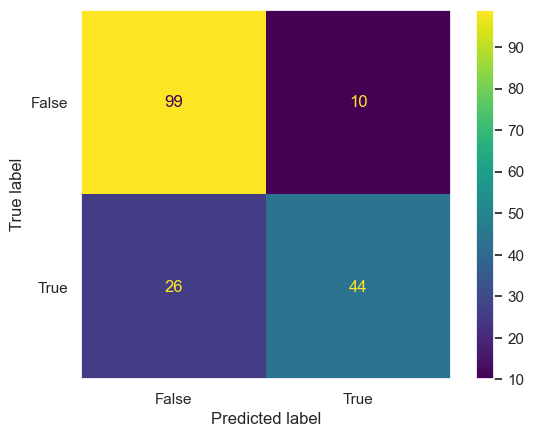

In [64]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 99
False postive: 10
False negative: 26
True postive: 44


**ROC-AUC CUrve**

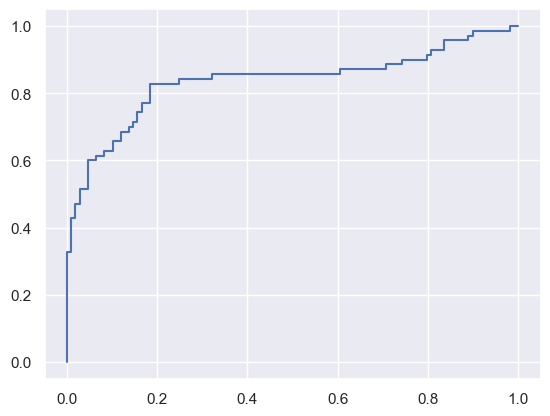

In [66]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [67]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

**predictions**

In [68]:
y_pred_NB=NBtree.predict(X_test)

**Metrices**

In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 79.33
F1 is: 0.73
Precision is: 0.75
Recall is: 0.71


**Confusion Metrices**

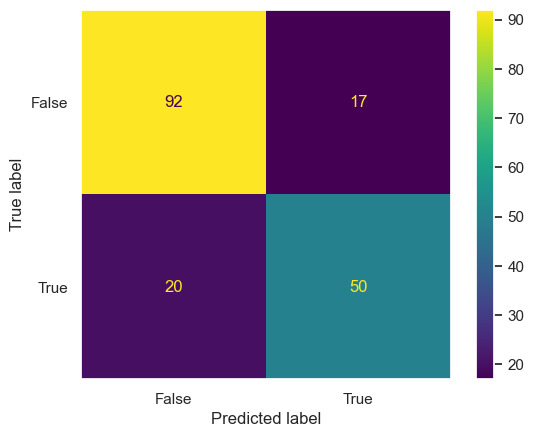

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 92
False postive: 17
False negative: 20
True postive: 50


**Roc-Auc Curve**

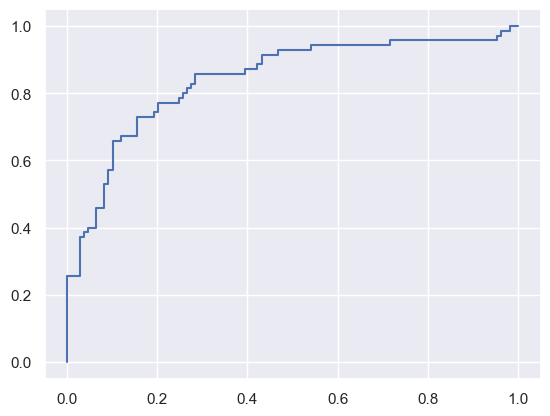

In [72]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

**Predictions**

In [74]:
y_pred_KNN=KNNtree.predict(X_test)

**Metrices**

In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 60.34
F1 is: 0.37
Precision is: 0.49
Recall is: 0.3


**confusion Metrices**

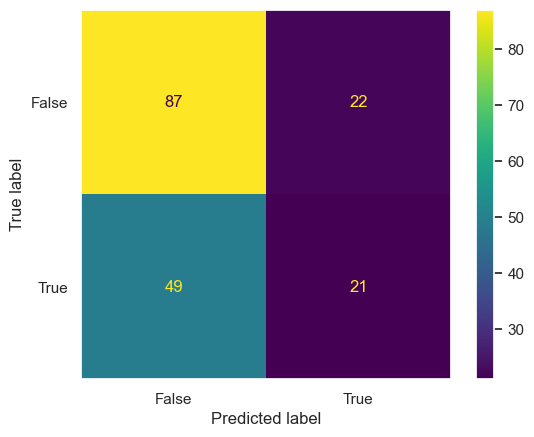

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 87
False postive: 22
False negative: 49
True postive: 21


**ROC -AUC Curve**

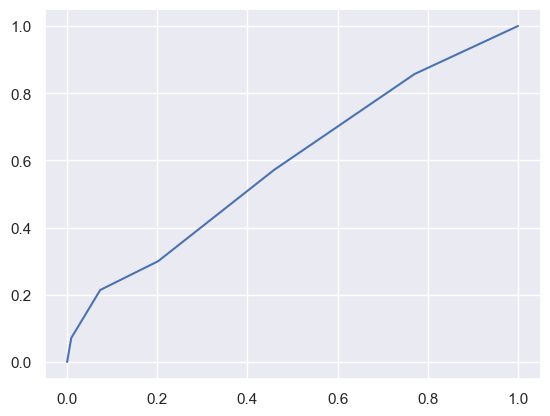

In [78]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

**PREdiction**

In [80]:
y_pred_RF=RFtree.predict(X_test)

**Metrices**

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 81.01
F1 is: 0.74
Precision is: 0.8
Recall is: 0.69


**Confusion Metrices**

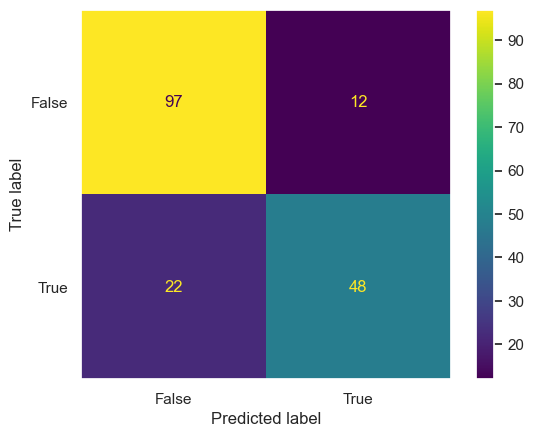

In [82]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


In [83]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 97
False postive: 12
False negative: 22
True postive: 48


**ROC - Auc Curve**

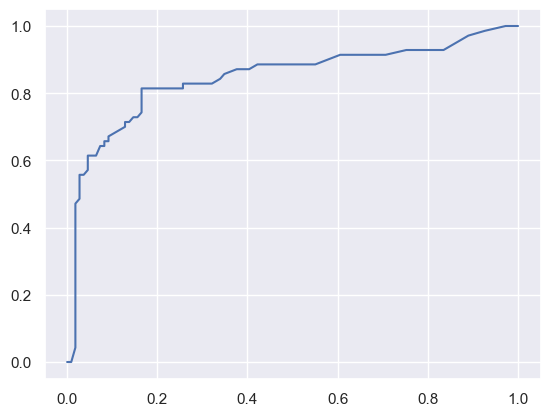

In [84]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

**Prediction**

In [86]:
y_pred_GB=RFtree.predict(X_test)

**Metrices**

In [87]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)

accuray is: 81.01
F1 is: 0.74
Precision is: 0.8
Recall is: 0.69


**Confusion Metrices**

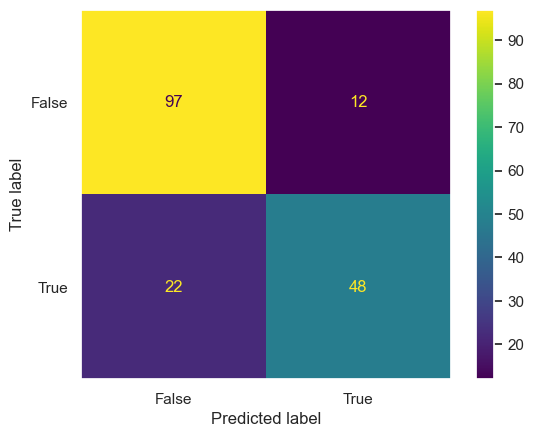

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 97
False postive: 12
False negative: 22
True postive: 48


**ROC - AUC Curve**

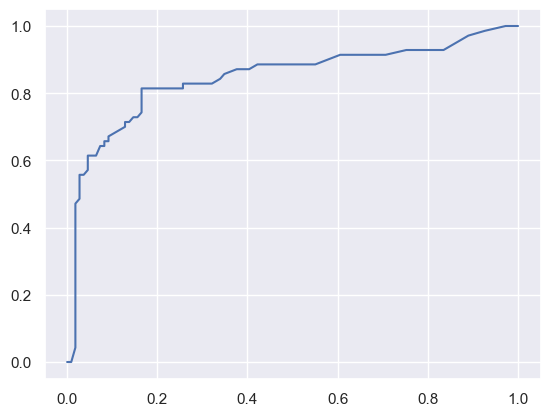

In [90]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**COmpare which Model Is best**

In [91]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['Decision Tree','K Nearest Neighbour','Logistic regression','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,73.18,0.64,0.71,0.68
K Nearest Neighbour,60.34,0.49,0.30,0.37
Logistic regression,79.89,0.81,0.63,0.71
Naive Bayes,79.33,0.75,0.71,0.73
Random Forest,81.01,0.80,0.69,0.74
Gradient Boosting,81.01,0.80,0.69,0.74


**MOdel With HyperParameter Tunning**

**Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [93]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [94]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [95]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6],
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[2,3,4,5],
    "random_state":[0,42]
}

In [96]:
import time
start = time.time()
grid_search = GridSearchCV(grid_tree,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          verbose=True)
end= time.time()

print("Te total time taken is:",(end-start))

Te total time taken is: 0.0


In [97]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [98]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The total time taken is : 8.506603240966797


In [99]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=0)

In [100]:
grid_search.best_score_

0.7977543583177387

In [101]:
grid_search.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 0}

In [102]:
grid_search.best_index_


260

**Developing Decision Tree with best Parameter**

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_leaf=5,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=0)

**Prediction**

In [104]:
y_pred_dt=dtree.predict(X_test)

**Metrices**

In [105]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [106]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 82.12
F1 is: 0.75
Precision is: 0.84
Recall is: 0.67
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       109
           1       0.84      0.67      0.75        70

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



**Confusion Metrices**

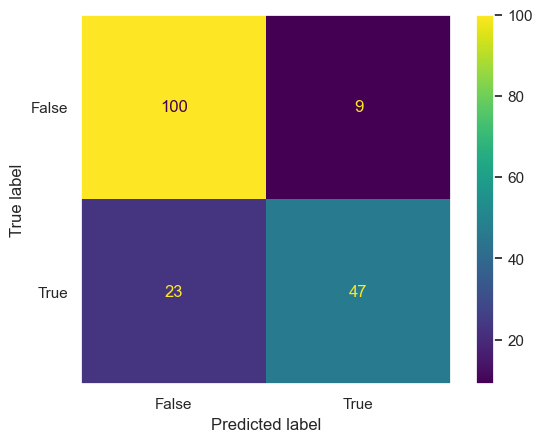

In [107]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [108]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 100
False postive: 9
False negative: 23
True postive: 47


**Roc - auc Curve**

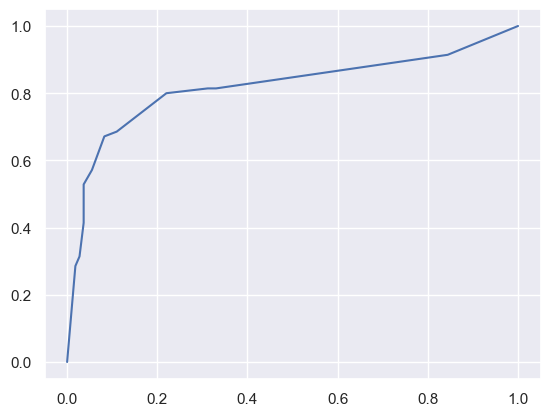

In [109]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [110]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
2,Sex,0.420473
1,Pclass,0.167771
5,Fare,0.161551
3,Age,0.160084
0,PassengerId,0.052530
4,SibSp,0.025852
6,Embarked,0.011739


**Random Forest**

In [111]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [112]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
RF_params=[keys for keys in grid_RF.get_params()]
print("available parameters for model :",RF_params)

available parameters for model : ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


**Create A Dictionary**

In [113]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [ 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

**Apply the Grid Search**

In [114]:
grid_search = GridSearchCV(grid_RF,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

**Fit The Model With Train**

In [115]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The total time taken is : 62.91731858253479


**Get The Best Param**

In [117]:
grid_search.best_index_

11

In [118]:
grid_search.best_score_

0.8187924751305033

In [119]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

**DEveloping The model With Best Parameter**

In [122]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 10,
                              max_features='sqrt',
                              n_estimators=200,
                              random_state=42)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

**Prediction**

In [123]:
y_pred_RF=RFtree.predict(X_test)

**Metrices**

In [124]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

In [125]:
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 81.01
F1 is: 0.74
Precision is: 0.8
Recall is: 0.69


**Confusion Metrices**

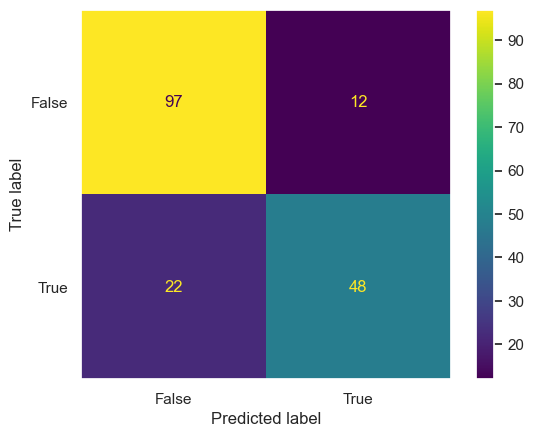

In [126]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [127]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 97
False postive: 12
False negative: 22
True postive: 48


**Roc - Auc Curve**

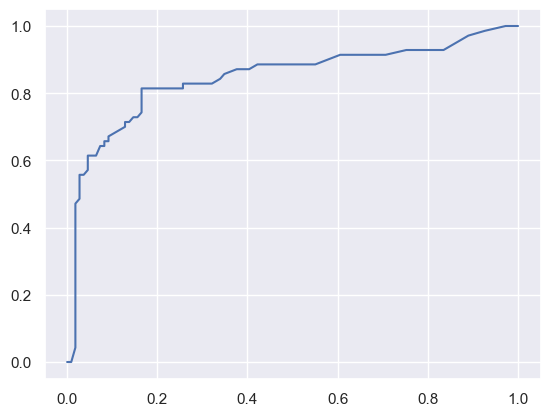

In [128]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [129]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [130]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
KNN_params=[keys for keys in grid_KNN.get_params()]
print("Parameter are:",KNN_params)

Parameter are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']


**Creating A Dictionary**

In [131]:
param_grid={
    'n_neighbors':[6,7,8,12],
    'leaf_size':[30,40,50,70],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

**Apply The grid**

In [132]:
grid_search = GridSearchCV(grid_KNN,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

**Fit the model With train**

In [133]:

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 70],
                         'n_neighbors': [6, 7, 8, 12]},
             scoring='accuracy', verbose=True)

In [134]:
grid_search.best_index_

3

In [135]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 12}

In [136]:
grid_search.best_score_

0.6460258051807347

In [137]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=12)

**DEveloping KNN Model With Best Parameter**

In [138]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

**Prediction**

In [139]:
y_pred_KN=KN.predict(X_test)

**Metrices**

In [140]:
acc_KN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KN=round(f1_score(y_test,y_pred_KN),2)
precision_KN=round(precision_score(y_test,y_pred_KN),2)
recall_KN=round(recall_score(y_test,y_pred_KN),2)

print("accuray is:",acc_KN)
print("F1 is:",f1_KN)
print("Precision is:",precision_KN)
print("Recall is:",recall_KN)
print(classification_report(y_test,y_pred_KN))

accuray is: 63.13
F1 is: 0.31
Precision is: 0.58
Recall is: 0.21
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       109
           1       0.58      0.21      0.31        70

    accuracy                           0.63       179
   macro avg       0.61      0.56      0.53       179
weighted avg       0.62      0.63      0.58       179



**Confusion Metrices**

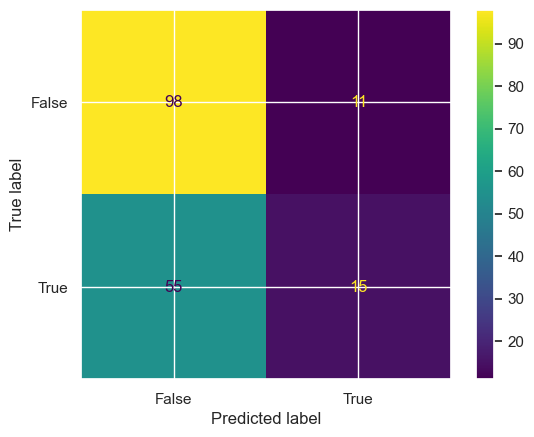

In [141]:
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [142]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 98
False postive: 11
False negative: 55
True postive: 15


**ROc Auc Ciurve**

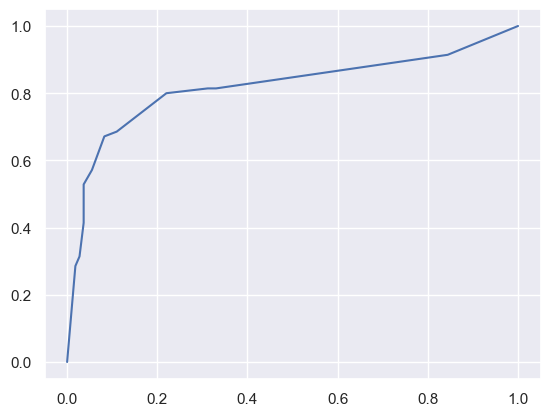

In [143]:
y_KN_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KN_pred_prob) 
plt.plot(fpr,tpr)

**Naive Bayes**

In [144]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [145]:
from sklearn.model_selection import GridSearchCV,cross_val_score
NB=GaussianNB()
NB

GaussianNB()

In [146]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [147]:
NB_params=[keys for keys in NB.get_params()]
NB_params

['priors', 'var_smoothing']

**Create A Dictionary**

In [148]:
param_grid={
    'priors': [None, 'entropy'],
    'var_smoothing':[0.005]
}

In [149]:
grid_search = GridSearchCV(NB,  
                           param_grid, # params 
                           scoring='accuracy',
                           cv=4,
                          verbose=True) # cross validation


In [150]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None, 'entropy'], 'var_smoothing': [0.005]},
             scoring='accuracy', verbose=True)

**Get The Best Parameter**

In [151]:
grid_search.best_index_

0

In [152]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [153]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [154]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.005)

**DEveloping Naive Bayes With Best Parameter**

In [155]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.005)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.005)

In [156]:
y_pred_NB=NB.predict(X_test)

In [157]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)
print(classification_report(y_test,y_pred_NB))

accuray is: 65.36
F1 is: 0.39
Precision is: 0.62
Recall is: 0.29
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       109
           1       0.62      0.29      0.39        70

    accuracy                           0.65       179
   macro avg       0.64      0.59      0.57       179
weighted avg       0.65      0.65      0.61       179



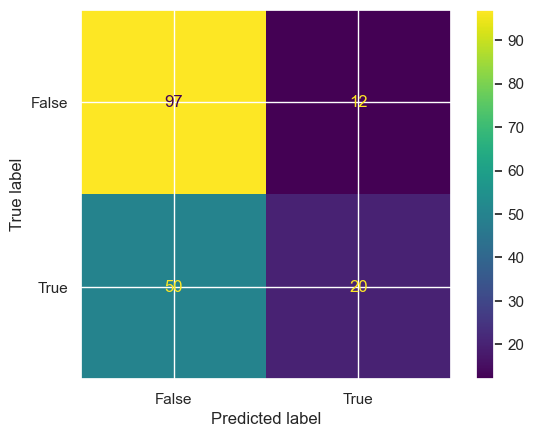

In [158]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [159]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 97
False postive: 12
False negative: 50
True postive: 20


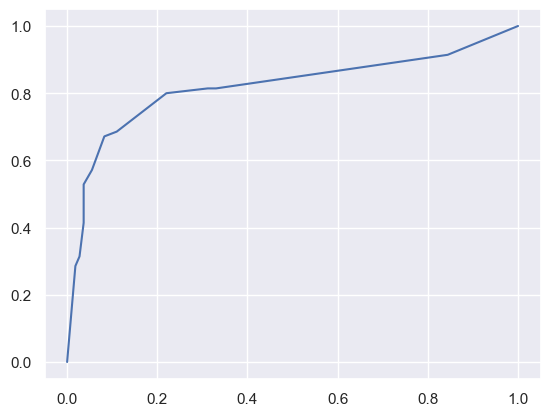

In [160]:
y_NB_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**LOgistic RegressioN**

In [161]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [162]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [164]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [165]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Create A Dictionary**

In [166]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [167]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [168]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [169]:
grid_search.best_index_

1

In [170]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [171]:
grid_search.best_score_

0.7514044943820225

In [172]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=42)

**DEveloping The model With best Parameter**

In [173]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [174]:
y_pred_log=log.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

In [176]:
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 82.68
F1 is: 0.76
Precision is: 0.84
Recall is: 0.69


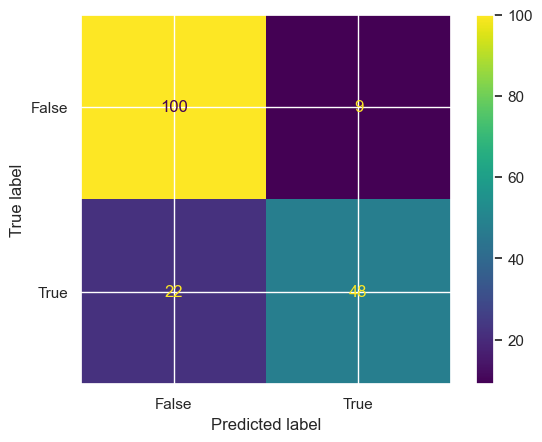

In [177]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [178]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 100
False postive: 9
False negative: 22
True postive: 48


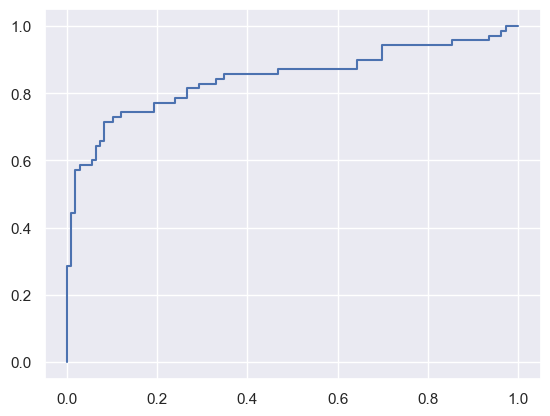

In [180]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [181]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
    "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['Decision Tree','K nearest Neighbour','Logistic Regression ','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,82.12,0.84,0.67,0.75
K nearest Neighbour,60.34,0.49,0.30,0.37
Logistic Regression,82.68,0.84,0.69,0.76
Naive Bayes,65.36,0.62,0.29,0.39
Random Forest,81.01,0.80,0.69,0.74


In [187]:
import pickle
pickle.dump(RFTree,open("best_model",'wb'))

In [188]:
y_pred_RF

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)